In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
#!pip install pyarrow

### 1. read .feather file as a df

In [3]:
df = pd.read_feather("../s2orc/20200705v1/sample/df_merged.feather")

In [4]:
df.head(3)

,paper_id,abstract_x,mag_field_of_study,body_text
0,77491955,"OBJECTIVE: To report a case of a large, bilate...",Medicine,None
1,77493472,Leukotrienes (LTs) are important lipid mediato...,Medicine,None
2,77494170,A NDB bull weighing 350kg underwent a ruffian ...,Medicine,None


In [5]:
df.shape

(368, 4)

In [6]:
#df_abstract = df.filter(['paper_id', 'abstract_x', 'mag_field_of_study']).dropna()
#df_abstract

In [7]:
#df_abstract

In [8]:
df_abstract = df.drop(columns=["body_text"])
df_bodytext = df.drop(columns=['abstract_x'])

### 2. make a countplot

<AxesSubplot:xlabel='mag_field_of_study', ylabel='count'>

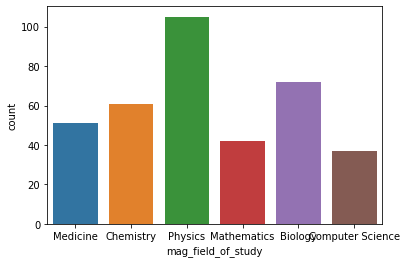

In [9]:
sn.countplot(data=df_abstract, x=df.mag_field_of_study)

### 3. calculate length of abstract_x column_value lengths

In [10]:
df_abstract["abs_len"] = df_abstract.abstract_x.apply(len)

<AxesSubplot:xlabel='mag_field_of_study', ylabel='abs_len'>

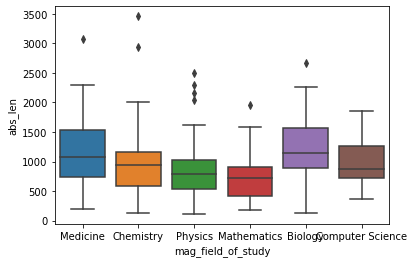

In [11]:
sn.boxplot(x=df_abstract.mag_field_of_study, y=df_abstract.abs_len)

### 4. Drop rows with none values and empty strings based on the body_text column

In [12]:
df_bodytext.dropna(inplace=True)
df_bodytext=df_bodytext[df_bodytext.body_text!='']
df_bodytext.reset_index(inplace=True, drop=True)

<AxesSubplot:xlabel='mag_field_of_study', ylabel='count'>

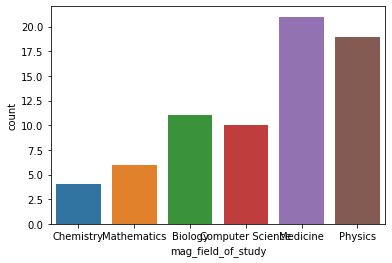

In [13]:
sn.countplot(data=df_bodytext, x=df_bodytext.mag_field_of_study)

### 5. calculate the body_text values length

In [14]:
df_bodytext["body_len"] = df_bodytext.body_text.apply(len)

<AxesSubplot:xlabel='mag_field_of_study', ylabel='body_len'>

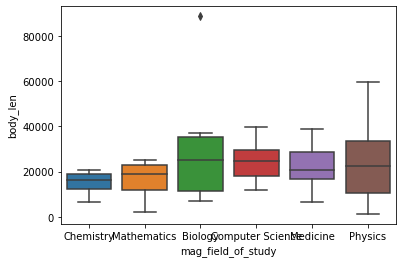

In [15]:
sn.boxplot(x=df_bodytext.mag_field_of_study, y=df_bodytext.body_len)

### 6. symbols

In [16]:
p_signs = list("><?:;!.,&~+=-)/%(_")

df_abstract["abstract_x_p_parsed0"]=df_abstract["abstract_x"]
df_bodytext["bodytext_p_parsed0"]=df_bodytext["body_text"]


for sign in p_signs:
    df_abstract["abstract_x_p_parsed0"]=df_abstract["abstract_x_p_parsed0"].str.replace(sign, '')
    df_bodytext["bodytext_p_parsed0"]=df_bodytext["bodytext_p_parsed0"].str.replace(sign, '')


/Users/udayts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/udayts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


### 7. 's removal

In [17]:
df_abstract["abstract_x_p_parsed1"] = df_abstract["abstract_x_p_parsed0"].str.replace("'s", "")
df_bodytext["bodytext_p_parsed1"] = df_bodytext["bodytext_p_parsed0"].str.replace("'s", "")

### 8. Lemmatization

In [18]:
#nltk.download("punkt")
#print("-----------------------------")
#nltk.download("wordnet")

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()

In [20]:
x_rows = len(df_abstract)
y_rows = len(df_bodytext)


lemma_abstract_textlist = []
lemma_bodytext_textlist = []


for row in range(0,x_rows):
    lemma_abstract_list = []
    text_abstract = df_abstract.loc[row]["abstract_x_p_parsed1"]
    text_abstract_words = text_abstract.split(" ")
    
    for abstract_word in text_abstract_words:
        lemma_abstract_list.append(wordnet_lemmatizer.lemmatize(abstract_word, pos="v"))
    
    lemma_abstract_text = " ".join(lemma_abstract_list)
    lemma_abstract_textlist.append(lemma_abstract_text)
    
    
for row in range(0,y_rows):
    lemma_bodytext_list = []
    text_bodytext = df_bodytext.loc[row]["bodytext_p_parsed1"]
    text_bodytext_words = text_bodytext.split(" ")
    
    for bodytext_word in text_bodytext_words:
        lemma_bodytext_list.append(wordnet_lemmatizer.lemmatize(bodytext_word, pos="v"))
    
    lemma_bodytext_text = " ".join(lemma_bodytext_list)
    lemma_bodytext_textlist.append(lemma_bodytext_text)

In [21]:
df_abstract["abstract_x_p_parsed2"] = lemma_abstract_textlist
df_bodytext["bodytext_p_parsed2"] = lemma_bodytext_textlist

### 9. stop words

In [22]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/udayts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = list(stopwords.words('english'))

In [24]:
#stop_words[0:10]

In [25]:
df_abstract["abstract_x_p_parsed3"] = df_abstract["abstract_x_p_parsed2"]
df_bodytext["bodytext_p_parsed3"] = df_bodytext["bodytext_p_parsed2"]

for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df_abstract["abstract_x_p_parsed3"] = df_abstract["abstract_x_p_parsed3"].str.replace(regex_stopword, "")
    df_bodytext["bodytext_p_parsed3"] = df_bodytext["bodytext_p_parsed3"].str.replace(regex_stopword, "")

/Users/udayts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/udayts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [26]:
list_col_abstract = ['paper_id', 'abstract_x', 'mag_field_of_study', 'abstract_x_p_parsed3']
list_col_bodytext = ['paper_id', 'mag_field_of_study', 'body_text', 'bodytext_p_parsed3']

df_abstract1=df_abstract[list_col_abstract]
df_bodytext1=df_bodytext[list_col_bodytext]

df_abstract1=df_abstract1.rename(columns={"abstract_x_p_parsed3": "abstract_parsed"})
df_bodytext1=df_bodytext1.rename(columns={"bodytext_p_parsed3": "bodytext_parsed"})

### 10. label coding

In [27]:
fieldstudy_codes={
    'Medicine': 0,
    'Chemistry': 1,
    'Physics': 2,
    'Mathematics': 3,
    'Biology': 4,
    'Computer Science':5
}

In [28]:
df_abstract1["fieldstudy_code"]= df_abstract1["mag_field_of_study"]
df_abstract1 = df_abstract1.replace({"fieldstudy_code":fieldstudy_codes})

df_bodytext1["fieldstudy_code"]= df_bodytext1["mag_field_of_study"]
df_bodytext1 = df_bodytext1.replace({"fieldstudy_code":fieldstudy_codes})

In [29]:
df_abstract1.to_feather('abstract1.feather')
df_bodytext1.to_feather('bodytext1.feather')

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(df_abstract1["abstract_parsed"], df_abstract1["fieldstudy_code"], test_size=0.25, random_state=23, stratify=df_abstract1["fieldstudy_code"])
#X_train, X_test, y_train, y_test = train_test_split(df_bodytext1["bodytext_parsed"], df_bodytext1["fieldstudy_code"], test_size=0.25, random_state=23, stratify=df_bodytext1["fieldstudy_code"])